## Text Visualization

* Python version **3.9.19**
* Installing with conda: `conda create --name pyLDA python=3.9.19`
* To verify current "package" version: `pip list | grep "package"`
* requirements:
    * nltk
    * jupyter
    * pandas==1.5.3
    * scikit-learn
    * gensim
    * spacy==3.2.6
    * matplotlib
    * wordcloud
    * scipy==1.12
    * pyLDAvis==3.4.1

In [1]:
# !pip install nltk jupyter scikit-learn gensim spacy~=3.2.6 matplotlib wordcloud scipy==1.12 pyLDAvis==3.4.1 pandas==1.5.3

In [2]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint

In [3]:
newsgroups_test = fetch_20newsgroups(subset='test')

In [4]:
pprint(list(newsgroups_test.target_names))
pprint(newsgroups_test.filenames.shape)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
(7532,)


In [5]:
categories = ['rec.sport.baseball', 'talk.politics.guns', 'misc.forsale']

In [6]:
newsgroups = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'), categories = categories)

In [7]:
data = newsgroups.data
print(len(data))
data[:2]

1728


["I just wanted to let everyone know that I have lost what little respect I have\nfor Jim LeFebvre after seeing today's Cubs game. First of all how could he\nstart Maldonado over May. After the way May played at the end of last year and\nthe way he tore up the Cactus League how could you let him sit the bench? Not\nto mention that a right hander (Maddux) started. I really blew my top when\nLefebvre pinch hit for Rick Wilkins with TOMMY SHIELDS! How can you do that\njust because of the lefty-righty thing, too much is made of that. Wilkins is\ntwice the hitter that Shields is. Then the next batter was Jose Vizcaino, one\nof the weakest hitters I have ever seen, and who had looked terrible at bat all\nday, and Lefebre let him hit, while May still sat the bench. I think even Arnie\nHarris was stunned by this because he showed May sitting in the dugout while\nVizcaino was batting. Face it Lefebvre has got to be the worst manager in\nbaseball.\n\t\t\t\t\t\tA dishard Cub fan\n",
 'I am lookin

### Preprocessing

In [8]:
import gensim
import spacy
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk # stemm

In [13]:
import spacy
try:
    import en_core_web_sm
except:
    spacy.cli.download("en_core_web_sm")
    import en_core_web_sm

In [14]:
#nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp = en_core_web_sm.load(disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

In [9]:
data_words = list(map(simple_preprocess, data))
data_words

[['just',
  'wanted',
  'to',
  'let',
  'everyone',
  'know',
  'that',
  'have',
  'lost',
  'what',
  'little',
  'respect',
  'have',
  'for',
  'jim',
  'lefebvre',
  'after',
  'seeing',
  'today',
  'cubs',
  'game',
  'first',
  'of',
  'all',
  'how',
  'could',
  'he',
  'start',
  'maldonado',
  'over',
  'may',
  'after',
  'the',
  'way',
  'may',
  'played',
  'at',
  'the',
  'end',
  'of',
  'last',
  'year',
  'and',
  'the',
  'way',
  'he',
  'tore',
  'up',
  'the',
  'cactus',
  'league',
  'how',
  'could',
  'you',
  'let',
  'him',
  'sit',
  'the',
  'bench',
  'not',
  'to',
  'mention',
  'that',
  'right',
  'hander',
  'maddux',
  'started',
  'really',
  'blew',
  'my',
  'top',
  'when',
  'lefebvre',
  'pinch',
  'hit',
  'for',
  'rick',
  'wilkins',
  'with',
  'tommy',
  'shields',
  'how',
  'can',
  'you',
  'do',
  'that',
  'just',
  'because',
  'of',
  'the',
  'lefty',
  'righty',
  'thing',
  'too',
  'much',
  'is',
  'made',
  'of',
  'that'

### Stopwords

Stopwords are a set of commonly used words in a language. Examples of stop words in English are “a,” “the,” “is,” “are,” etc.

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/felipe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['com', "mauro", "juanpi", 'from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [12]:
data_without_stopwords = [ [word for word in text if word not in stop_words] for text in data_words]


### Stemming vs Lemmatization

* Stemming:
    * Keeps the roots base form (stem) of the word.
    * Content analysis without knowledge of the context.
    * Simpler and faster.
* Lemmatization:
    * Keep the meaningful base form (lemma) of the word.
    * Morphological analysis leveraging the context.
    * Accurate and slower.

<figure>
  <img src="./img/Stemm_Lemm.png" style="height:300px;width:500px">
</figure>

In [15]:
data_ready = []

for sent in data_without_stopwords:
    # Parse the sentence using the loaded 'en' model object `nlp`. Extract the lemma for each token and join
    doc = nlp(" ".join(sent))
    data_ready.append([token.lemma_ for token in doc if token.pos_ in allowed_postags]) 

In [16]:
# remove stopwords once more after lemmatization
data_ready = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in data_ready]
data_ready

[['let',
  'lose',
  'little',
  'respect',
  'today',
  'cubs',
  'game',
  'first',
  'way',
  'play',
  'end',
  'last',
  'year',
  'way',
  'tear',
  'let',
  'sit',
  'bench',
  'mention',
  'hander',
  'maddux',
  'start',
  'really',
  'blow',
  'top',
  'lefebvre',
  'pinch',
  'hit',
  'wilkin',
  'shield',
  'lefty',
  'righty',
  'thing',
  'much',
  'wilkin',
  'twice',
  'hitter',
  'shield',
  'next',
  'batter',
  'jose',
  'vizcaino',
  'weak',
  'hitter',
  'ever',
  'look',
  'terrible',
  'bat',
  'day',
  'let',
  'hit',
  'still',
  'sit',
  'stun',
  'show',
  'sit',
  'dugout',
  'vizcaino',
  'batting',
  'face',
  'bad',
  'manager',
  'baseball',
  'dishard',
  'fan'],
 ['look',
  'sell',
  'follow',
  'battery',
  'headset',
  'unit',
  'leather',
  'case',
  'new',
  'cell',
  'condition',
  'scratch',
  'front',
  'visible',
  'leather',
  'case',
  'interested',
  'offer',
  'rich'],
 ['disk',
  'drive',
  'extended',
  'pad',
  'dosshell',
  'excel',
  '

In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]
len(id2word), len(corpus)

(11593, 1728)

## Topic modeling 
Is a statistical technique used in natural language processing (NLP) to discover abstract topics or themes present in a collection of documents. 

### Latent Dirichlet Allocation (LDA)

<figure>
  <img src="./img/LDA.png" style="height:350px;width:500px">
</figure>

* LDA assumes that documents are probabilistically generated from a mixture of topics, and each topic is a distribution over words.
  
* LDA provides a probabilistic framework for modeling topics in text corpora. It assigns a probability distribution over words for each topic, making the topics interpretable.
  
* LDA usually takes a document-term matrix as input, where each row represents a document, each column represents a term, and the cell values represent the frequency of each term in the corresponding document.

In [18]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True
                                            )
pprint(lda_model.print_topics())

[(0,
  '0.012*"offer" + 0.012*"price" + 0.012*"sale" + 0.011*"include" + '
  '0.011*"new" + 0.010*"sell" + 0.008*"drive" + 0.008*"ask" + 0.007*"list" + '
  '0.007*"card"'),
 (1,
  '0.018*"gun" + 0.010*"people" + 0.008*"state" + 0.007*"weapon" + '
  '0.006*"time" + 0.006*"law" + 0.005*"bill" + 0.004*"risk" + 0.004*"death" + '
  '0.004*"kill"'),
 (2,
  '0.018*"year" + 0.010*"game" + 0.010*"time" + 0.009*"last" + 0.009*"well" + '
  '0.008*"team" + 0.008*"player" + 0.007*"look" + 0.007*"play" + '
  '0.006*"baseball"')]


### Non-negative Matrix Factorization (NMF)

<figure>
  <img src="./img/NMF.png" style="height:300px;width:600px">
</figure>

* NMF assumes that documents are represented as a combination of non-negative basis vectors (topics), and each word in the document is a non-negative linear combination of these topics.

* NMF decomposes the document-term matrix into two lower-dimensional matrices (basis vectors and coefficients). While the topics extracted by NMF are not directly interpretable as probability distributions, they can still capture meaningful patterns in the data.

* NMF also takes a document-term matrix as input, but it requires non-negative values, making it suitable for tasks such as image processing and audio analysis in addition to text mining.

In [19]:
# Fit NMF model
nmf_model = gensim.models.Nmf(corpus = corpus,     # Document-Term Matrix
                              id2word = id2word,   # Map word IDs to words
                              num_topics = 4,     # Number of latent topics to extract
                              random_state = 100,
                              passes = 100,        # N° of passes through the corpus during training
                              chunksize=10,
                              )
pprint(nmf_model.print_topics())

[(0,
  '0.028*"firearm" + 0.026*"section" + 0.023*"weapon" + 0.018*"license" + '
  '0.017*"military" + 0.015*"issue" + 0.014*"person" + 0.013*"dangerous" + '
  '0.013*"carry" + 0.013*"ordnance"'),
 (1,
  '0.077*"appear" + 0.040*"art" + 0.022*"man" + 0.018*"annual" + '
  '0.018*"sabretooth" + 0.018*"punisher" + 0.018*"cover" + 0.017*"new" + '
  '0.017*"rider" + 0.017*"wolverine"'),
 (2,
  '0.023*"gun" + 0.010*"homicide" + 0.009*"rate" + 0.008*"year" + '
  '0.007*"people" + 0.006*"study" + 0.006*"handgun" + 0.006*"crime" + '
  '0.006*"time" + 0.005*"city"'),
 (3,
  '0.081*"file" + 0.034*"gun" + 0.018*"firearm" + 0.014*"control" + '
  '0.011*"handgun" + 0.008*"law" + 0.007*"crime" + 0.007*"bill" + '
  '0.006*"article" + 0.006*"transfer"')]


## Topic Visualization

In [20]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [21]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
#pyLDAvis.show(vis, local=False)
display(vis)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.107555  0.179972       1        1  45.381718
2     -0.145412 -0.162869       2        1  30.186598
0      0.252968 -0.017102       3        1  24.431685, topic_info=        Term        Freq       Total Category  logprob  loglift
333      gun  782.000000  782.000000  Default  30.0000  30.0000
54      year  508.000000  508.000000  Default  29.0000  29.0000
65     offer  282.000000  282.000000  Default  28.0000  28.0000
504    price  274.000000  274.000000  Default  27.0000  27.0000
162     sale  274.000000  274.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
59    follow  102.202835  144.973445   Topic3  -5.4155   1.0597
187     work  131.303781  262.204110   Topic3  -5.1650   0.7177
1431    hard   98.608656  168.959372   Topic3  -5.4513   0.8708
56      case  111.125222  291.039683   Topic3  -5.3318   0.4465
2616    file   86.330126  110.707168   Topic3  -5.5843   1.1606

[168 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
382       1  0.266506   actually
382       2  0.727490   actually
1543      1  0.991314      agent
2385      1  0.994428  amendment
384       1  0.089611        ask
...     ...       ...        ...
740       1  0.994973      write
740       3  0.010257      write
54        1  0.001966       year
54        2  0.996903       year
54        3  0.001966       year

[221 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

### WordCloud

In [22]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [23]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

In [24]:
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

In [28]:
topics = lda_model.show_topics(formatted=False)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer='word',
                                    tokenizer=lambda x: x,
                                    preprocessor=lambda x: x,
                                    token_pattern=None)

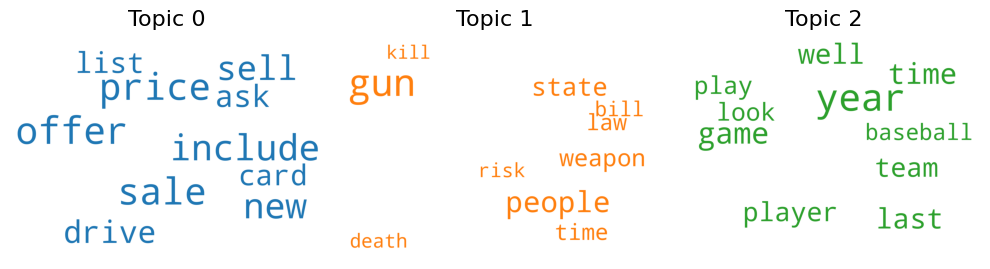

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### <div style="background: cornsilk;">Excercise</div>

Perform the same analysis using the dataset provided in data

### TF-IDF

In [ ]:
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_feature_names

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 4

In [ ]:
# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([id2word[feature_names[i][0]]
            for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


In [ ]:
print_top_words(nmf, tfidf_feature_names, n_top_words=10)